In [1]:
from typing import Any
from math import pi, sin, e
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import HTML
from matplotlib.animation import FuncAnimation
%matplotlib notebook

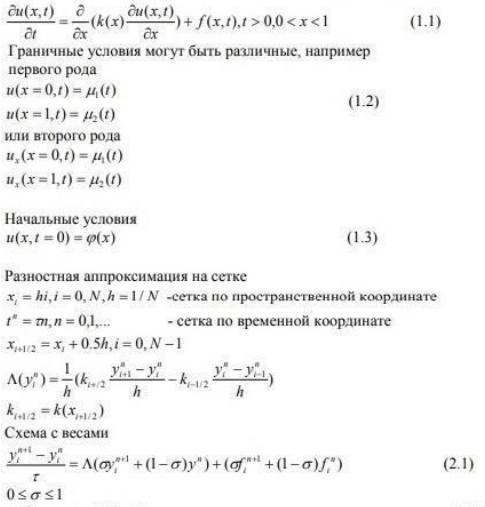

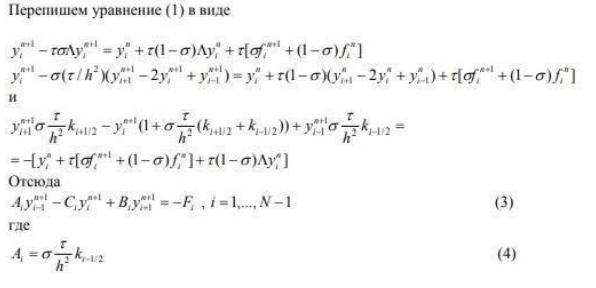

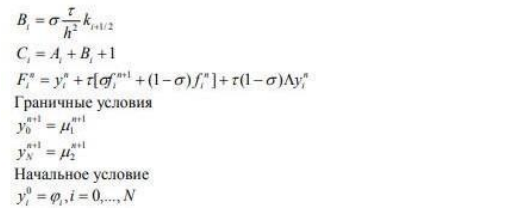

In [2]:
def run_through(n: int, 
                A: [float, ..., float],  
                B: [float, ..., float], 
                C: [float, ..., float],
                F: [float, ..., float], 
                x1: float, 
                x2: float,
                m1: float,
                m2: float) -> [float, ..., float]:
    a = [x1]
    b = [m1]
    y = []
    for i in range(n - 1):
        a.append(B[i] / (C[i] - A[i] * a[i]))
        b.append((F[i] + A[i] * b[i]) / (C[i] - A[i] * a[i]))
        
    y.append((m2 + x2 * b[n - 1]) / (1 - x2 * a[n - 1]))
    
    for i in reversed(range(n)):
        y.append(a[i] * y[n - 1 - i] + b[i])
    y.reverse()
    return y

In [3]:
def F(x = 0.0, t = 0.0):
    return 0

def k(x = 0.0):
    return 1

def fi(x = 0.0):
    return sin(pi * x)

def m1 (t = 0.0):
    return 0.0

def m2 (t = 0.0): 
    return 0.0
  
def analit_reshen(x: float, t: float): 
    return e**(-(pi**2) * t) * sin(pi * x)

def raznost(n: int,
            F: Any,
            k: Any,
            fi: Any,
            m1: Any,
            m2: Any,
            sigma: float,
            h: float,
            tay: float,
            T_max: float) -> list[list, ..., list]: 
    
    t = int(T_max / tay + 1)
    cost = sigma * tay / (h * h)
    y = [[0 for i in range(n + 1)] for i in range(t)]
    a = []
    b = []
    c = []
    f = []
    y[0][0] = m1(0)
    y[0][n] = m2(0)
    for i in range(n - 1):
        a.append(cost * k(i + 0.5))
        b.append(cost * k(i + 1.5))
        c.append(a[i] + b[i] + 1.0)
        y[0][i + 1] = fi(h * (i + 1))
    for i in range(1, t):
        for l in range(n - 1):
            f.append(tay * (sigma * F(h * (l + 1), tay * i) + (1 - sigma) * 
            F(h * (l + 1), tay * (i - 1))) + tay * (1 - sigma) / (h * h) * ((k(l + 1.5) * 
            (y[i - 1][l + 2] - y[i - 1][l + 1]) -
            k(l + 0.5) * (y[i - 1][l + 1] - y[i - 1][l]))) + y[i - 1][l + 1])
        y[i] = run_through(n, a, b, c, f, 0.0, 0.0, m1(i * tay), m2(i * tay));
        f = []
    return y

<IPython.core.display.Javascript object>


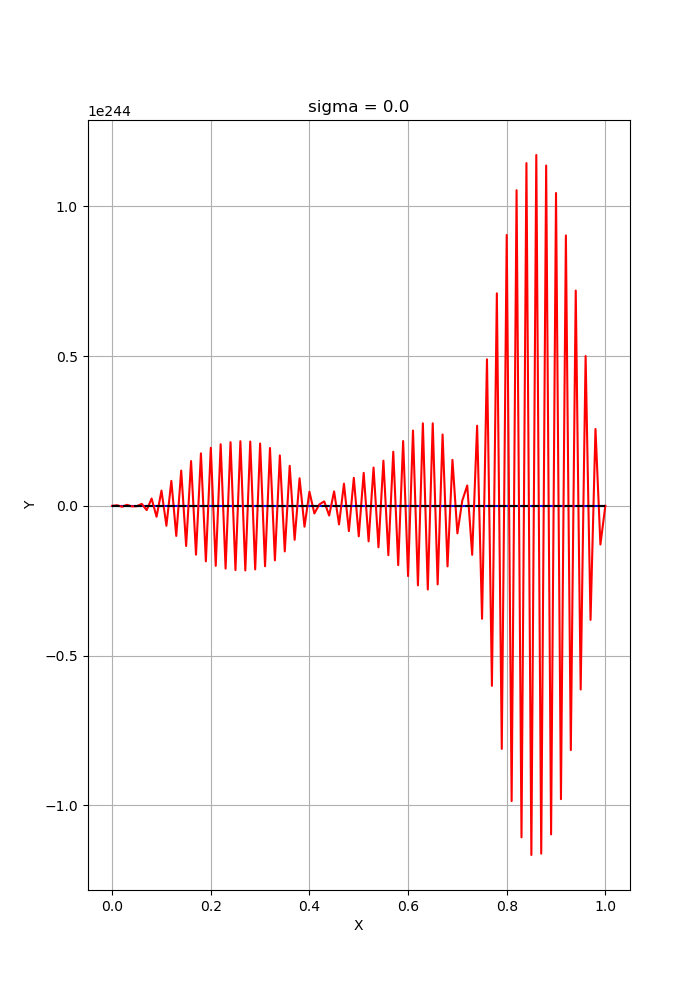

max =  2.8685037052438675e+306
t = 0.5, 1, 1.5


In [18]:
sigma = 0.0
h = 0.01
tay = 0.01
T_max = 3
my_max = 0
n = 100
t = int(T_max / tay + 1)
y = raznost(n, F, k, fi, m1, m2, sigma, h, tay, T_max)
for i in range(t):
    for l in range(n + 1):
        if (abs(y[i][l] - analit_reshen(h * l, i * tay)) > my_max):
            my_max = abs(y[i][l] - analit_reshen(h * l, i * tay))
x = list(map(lambda i: i/100, list(range(0, 101))))
fig = plt.figure(figsize=(7, 10))
ax = fig.add_subplot()
ax.plot(x, y[50], 'b')

print("max = ", my_max)
print("t = 0.5, 1, 1.5")
plt.title('sigma = 0.0')
ax.plot(x, y[100], 'r')
ax.plot(x, y[150])
ax.plot(x, list(map(lambda i: analit_reshen(i, 50), x)), '--k')

ax.grid()
plt.ylabel('Y')   
plt.xlabel('X') 
plt.show()

<IPython.core.display.Javascript object>


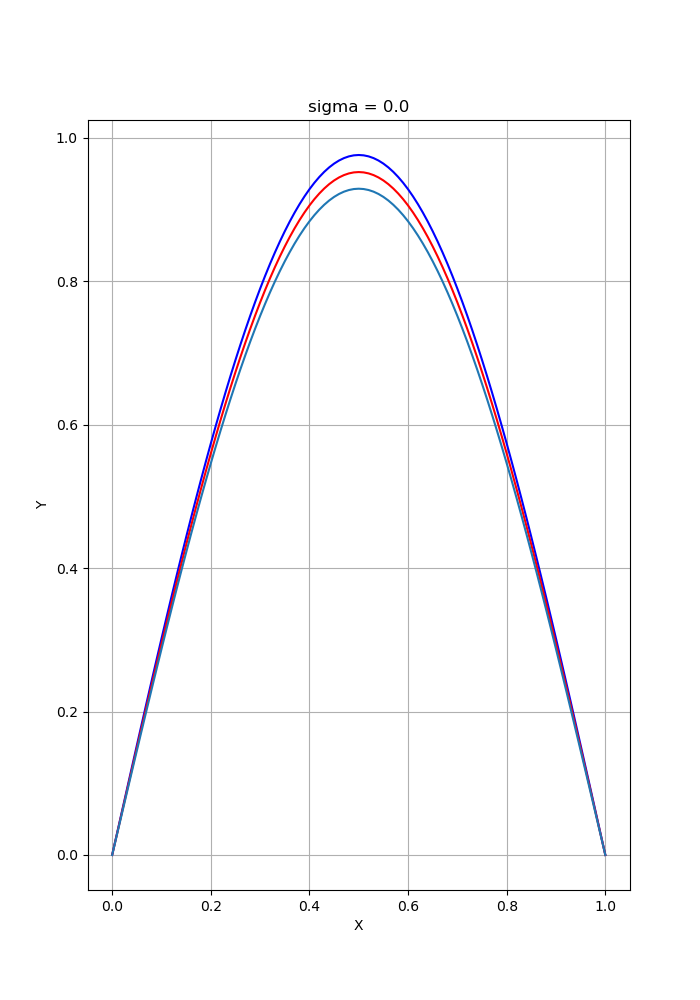

max =  6.052469419359774e-05
t = 0.5, 1, 1.5


In [11]:
sigma = 0.0
h = 0.01
tay = 0.00005
T_max = 3
my_max = 0
n = 100
t = int(T_max / tay + 1)
y = raznost(n, F, k, fi, m1, m2, sigma, h, tay, T_max)
for i in range(t):
    for l in range(n + 1):
        if (abs(y[i][l] - analit_reshen(h * l, i * tay)) > my_max):
            my_max = abs(y[i][l] - analit_reshen(h * l, i * tay))
x = list(map(lambda i: i/100, list(range(0, 101))))
fig = plt.figure(figsize=(7, 10))
ax = fig.add_subplot()
ax.plot(x, y[50], 'b')

print("max = ", my_max)
print("t = 0.5, 1, 1.5")
plt.title('sigma = 0.0')
ax.plot(x, y[100], 'r')
ax.plot(x, y[150])
#ax.plot(x, list(map(lambda i: analit_reshen(i, 50), x)))

ax.grid()
plt.ylabel('Y')   
plt.xlabel('X') 
plt.show()

<IPython.core.display.Javascript object>


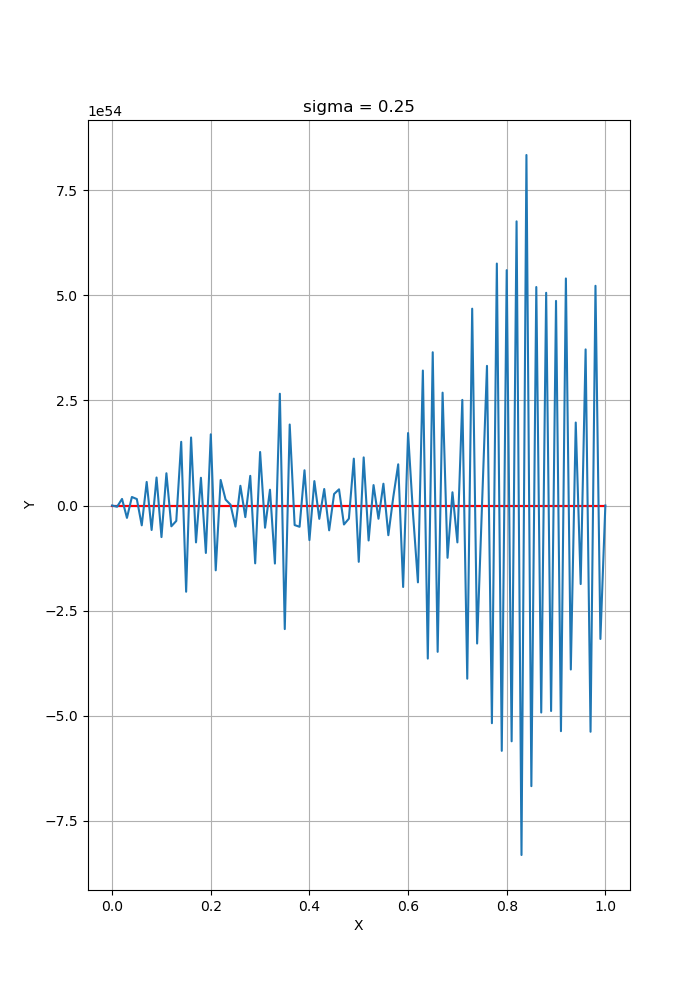

max =  3.827228744028721e+125
t = 0.5, 1, 1.5


In [10]:
sigma = 0.25
h = 0.01
tay = 0.01
T_max = 3
my_max = 0
n = 100
t = int(T_max / tay + 1)
y = raznost(n, F, k, fi, m1, m2, sigma, h, tay, T_max)
for i in range(t):
    for l in range(n + 1):
        if (abs(y[i][l] - analit_reshen(h * l, i * tay)) > my_max):
            my_max = abs(y[i][l] - analit_reshen(h * l, i * tay))
x = list(map(lambda i: i/100, list(range(0, 101))))
fig = plt.figure(figsize=(7, 10))
ax = fig.add_subplot()
ax.plot(x, y[50], 'b')

print("max = ", my_max)
print("t = 0.5, 1, 1.5")
plt.title('sigma = 0.25')
ax.plot(x, y[100], 'r')
ax.plot(x, y[150])
#ax.plot(x, list(map(lambda i: analit_reshen(i, 50), x)))

ax.grid()
plt.ylabel('Y')   
plt.xlabel('X') 
plt.show()

<IPython.core.display.Javascript object>


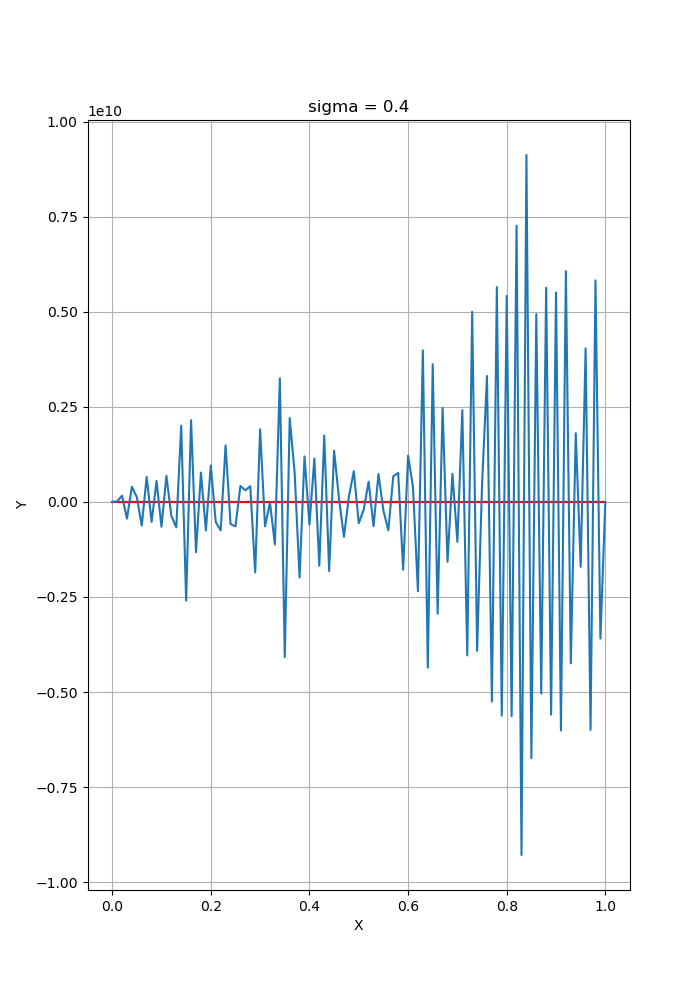

max =  4.579284606831652e+35
t = 0.5, 1, 1.5


In [9]:
sigma = 0.4
h = 0.01
tay = 0.01
T_max = 3
my_max = 0
n = 100
t = int(T_max / tay + 1)
y = raznost(n, F, k, fi, m1, m2, sigma, h, tay, T_max)
for i in range(t):
    for l in range(n + 1):
        if (abs(y[i][l] - analit_reshen(h * l, i * tay)) > my_max):
            my_max = abs(y[i][l] - analit_reshen(h * l, i * tay))
x = list(map(lambda i: i/100, list(range(0, 101))))
fig = plt.figure(figsize=(7, 10))
ax = fig.add_subplot()
ax.plot(x, y[50], 'b')

print("max = ", my_max)
print("t = 0.5, 1, 1.5")
plt.title('sigma = 0.4')
ax.plot(x, y[100], 'r')
ax.plot(x, y[150])
#ax.plot(x, list(map(lambda i: analit_reshen(i, 50), x)))

ax.grid()
plt.ylabel('Y')   
plt.xlabel('X') 
plt.show()

<IPython.core.display.Javascript object>


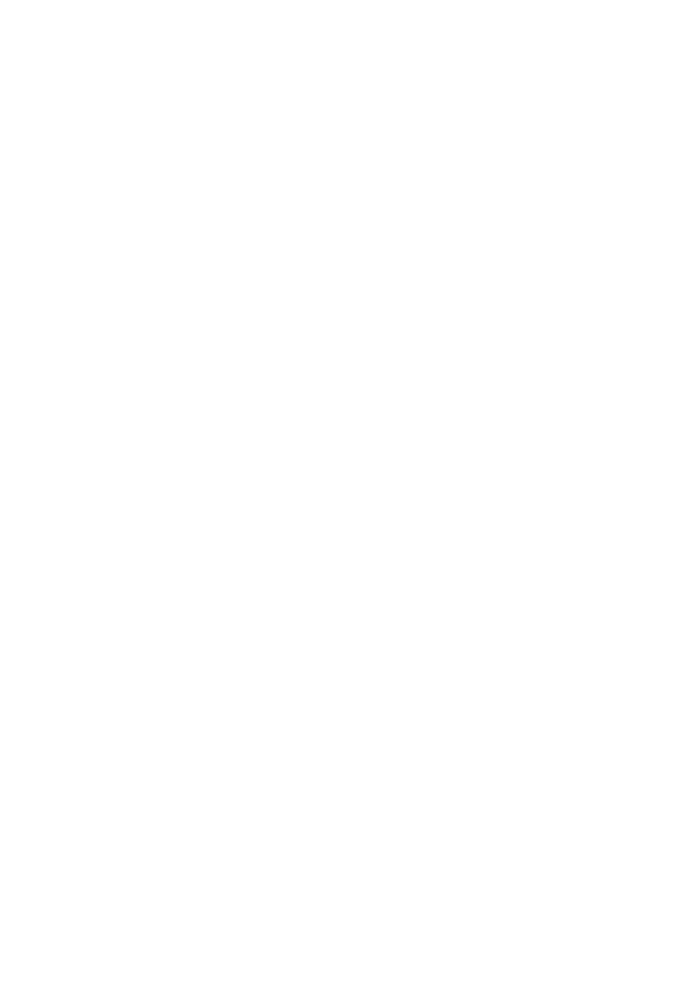

max =  1.2096577281850429e-05
t = 0.5, 1, 1.5


In [19]:
sigma = 0.4
h = 0.01
tay = 0.00005
T_max = 3
my_max = 0
n = 100
t = int(T_max / tay + 1)
y = raznost(n, F, k, fi, m1, m2, sigma, h, tay, T_max)
for i in range(t):
    for l in range(n + 1):
        if (abs(y[i][l] - analit_reshen(h * l, i * tay)) > my_max):
            my_max = abs(y[i][l] - analit_reshen(h * l, i * tay))
x = list(map(lambda i: i/100, list(range(0, 101))))
fig = plt.figure(figsize=(7, 10))
ax = fig.add_subplot()
ax.plot(x, y[50], 'b')

print("max = ", my_max)
print("t = 0.5, 1, 1.5")
plt.title('sigma = 0.4')
ax.plot(x, y[100], 'r')
ax.plot(x, y[150], 'k')
#ax.plot(x, list(map(lambda i: analit_reshen(i, 50), x)))

ax.grid()
plt.ylabel('Y')   
plt.xlabel('X') 
plt.show()

<IPython.core.display.Javascript object>


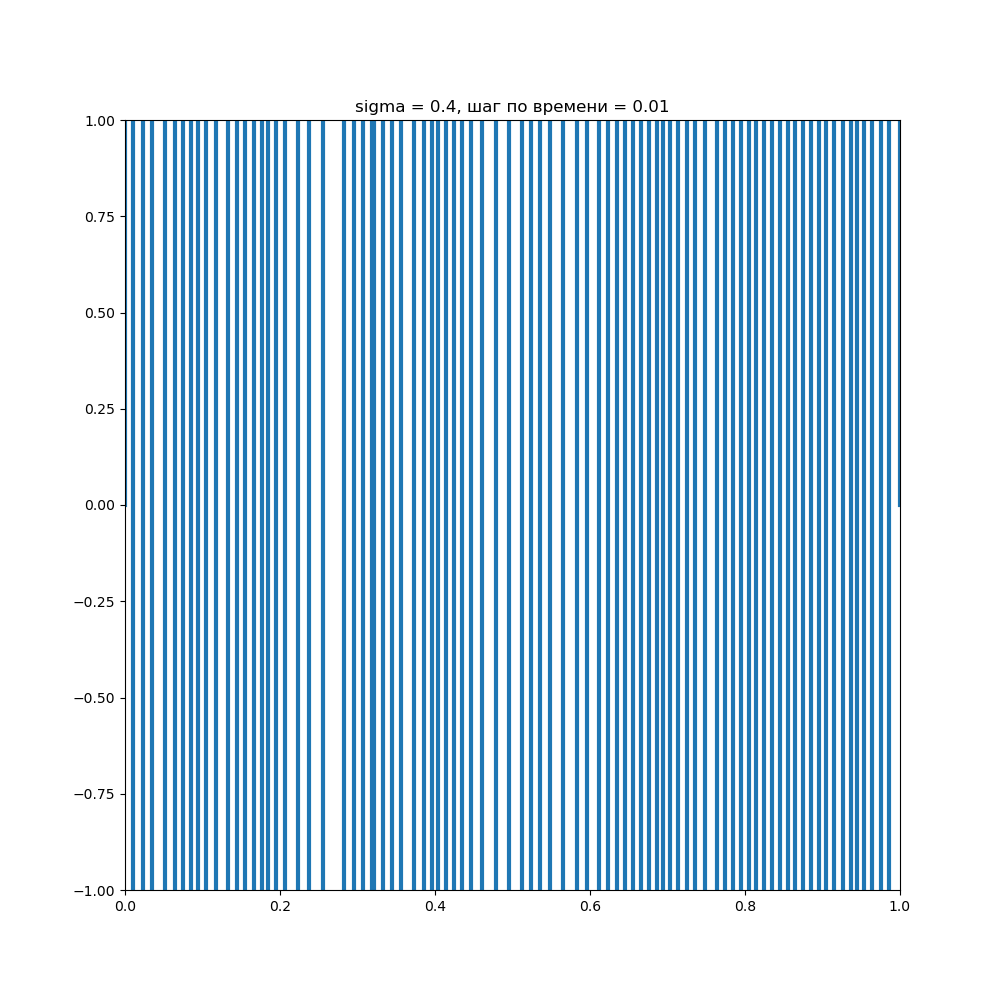

In [20]:
sigma = 0.4
h = 0.01
tay = 0.01
T_max = 3
my_max = 0
n = 100
t = int(T_max / tay + 1)
y = raznost(n, F, k, fi, m1, m2, sigma, h, tay, T_max)
for i in range(t):
    for l in range(n + 1):
        if (abs(y[i][l] - analit_reshen(h * l, i * tay)) > my_max):
            my_max = abs(y[i][l] - analit_reshen(h * l, i * tay))
x = list(map(lambda i: i/100, list(range(0, 101))))
# fig = plt.figure(figsize=(7, 10))
# ax = fig.add_subplot()
# ax.plot(x, y[50], 'b')

# print("max = ", my_max)
# print("t = 0.5, 1, 1.5")
# plt.title('sigma = 0.4')
# ax.plot(x, y[100], 'r')
# ax.plot(x, y[150])
# #ax.plot(x, list(map(lambda i: analit_reshen(i, 50), x)))

# ax.grid()
# plt.ylabel('Y')   
# plt.xlabel('X') 
# plt.show()
plt.clf()

fig = plt.figure(figsize=(10, 10))
ax = plt.axes(xlim=(0, 1), ylim=(-1, 1))
line, = ax.plot([], [], lw=3)

def init():
    line.set_data([], [])
    return line,

def animate(i):
    #x = [0.01 * a for a in range(0, 101)]
    z = y[i]
    line.set_data(x, z)
    return line,

anim = FuncAnimation(fig, animate, init_func=init,
                               frames=200, interval=2, blit=True)

plt.title('sigma = 0.4, шаг по времени = 0.01')
plt.show()

<IPython.core.display.Javascript object>


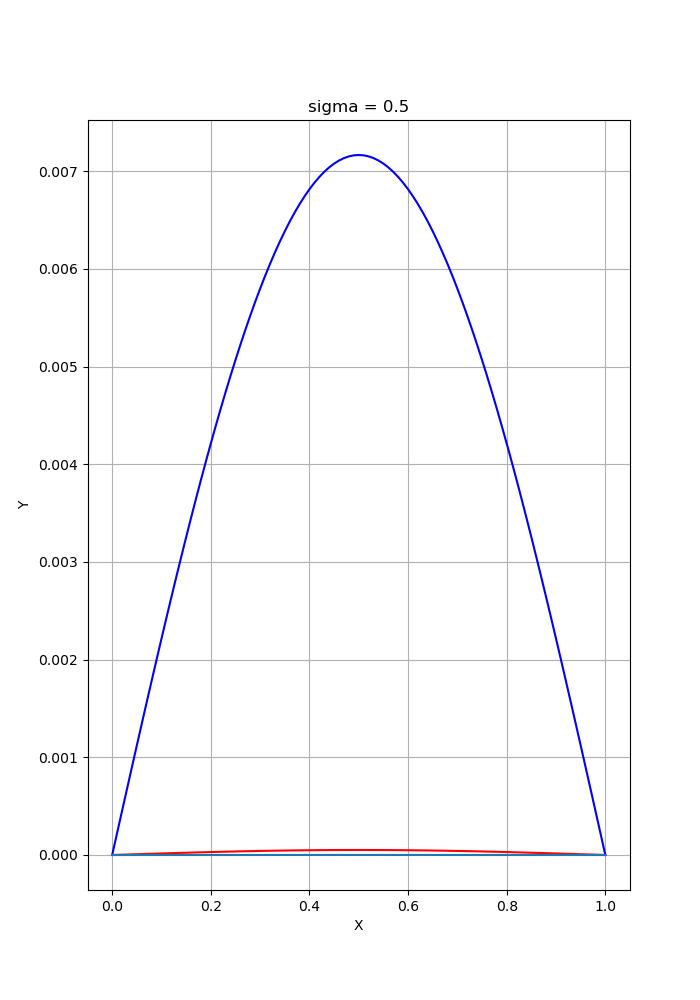

max =  0.00026861082377710455
t = 0.5, 1, 1.5


In [14]:
sigma = 0.5
h = 0.01
tay = 0.01
T_max = 3
my_max = 0
n = 100
t = int(T_max / tay + 1)
y = raznost(n, F, k, fi, m1, m2, sigma, h, tay, T_max)
for i in range(t):
    for l in range(n + 1):
        if (abs(y[i][l] - analit_reshen(h * l, i * tay)) > my_max):
            my_max = abs(y[i][l] - analit_reshen(h * l, i * tay))
x = list(map(lambda i: i/100, list(range(0, 101))))
fig = plt.figure(figsize=(7, 10))
ax = fig.add_subplot()
ax.plot(x, y[50], 'b')

print("max = ", my_max)
print("t = 0.5, 1, 1.5")
plt.title('sigma = 0.5')
ax.plot(x, y[100], 'r')
ax.plot(x, y[150])
#ax.plot(x, list(map(lambda i: analit_reshen(i, 50), x)))

ax.grid()
plt.ylabel('Y')   
plt.xlabel('X') 
plt.show()

<IPython.core.display.Javascript object>


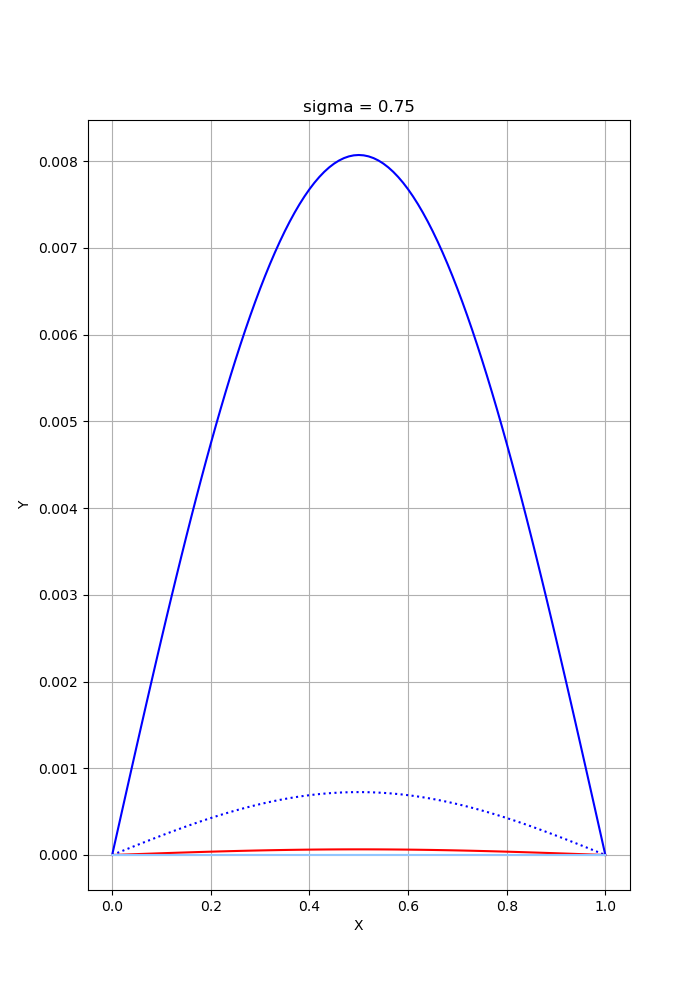

max =  0.008708868944834358
t = 0.5, 0.75, 1, 1.5


In [54]:
sigma = 0.75
h = 0.01
tay = 0.01
T_max = 3
my_max = 0
n = 100
t = int(T_max / tay + 1)
y = raznost(n, F, k, fi, m1, m2, sigma, h, tay, T_max)
for i in range(t):
    for l in range(n + 1):
        if (abs(y[i][l] - analit_reshen(h * l, i * tay)) > my_max):
            my_max = abs(y[i][l] - analit_reshen(h * l, i * tay))
x = list(map(lambda i: i/100, list(range(0, 101))))
fig = plt.figure(figsize=(7, 10))
ax = fig.add_subplot()
ax.plot(x, y[50], 'b')
ax.plot(x, y[75], ':b')
print("max = ", my_max)
print("t = 0.5, 0.75, 1, 1.5")
plt.title('sigma = 0.75')
ax.plot(x, y[100], 'r')
ax.plot(x, y[150])
#ax.plot(x, list(map(lambda i: analit_reshen(i, 50), x)))

ax.grid()
plt.ylabel('Y')   
plt.xlabel('X') 
plt.show()

<IPython.core.display.Javascript object>


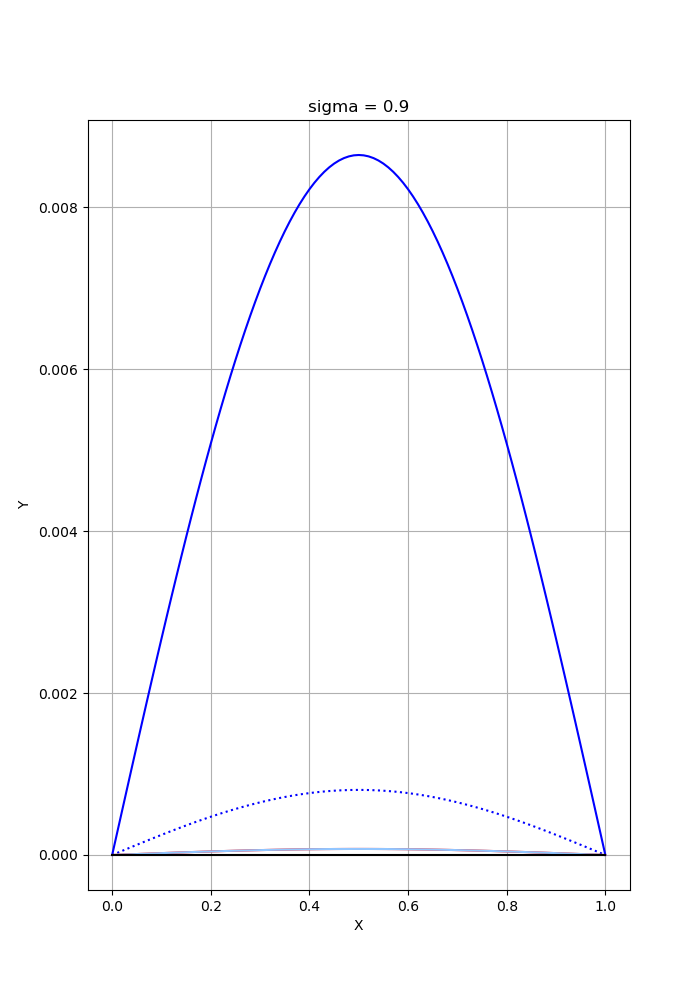

max =  0.013988488334089222
t = 0.5, 0.75, 1, 1.5


In [55]:
sigma = 0.9
h = 0.01
tay = 0.01
T_max = 3
my_max = 0
n = 100
t = int(T_max / tay + 1)
y = raznost(n, F, k, fi, m1, m2, sigma, h, tay, T_max)
for i in range(t):
    for l in range(n + 1):
        if (abs(y[i][l] - analit_reshen(h * l, i * tay)) > my_max):
            my_max = abs(y[i][l] - analit_reshen(h * l, i * tay))
x = list(map(lambda i: i/100, list(range(0, 101))))
fig = plt.figure(figsize=(7, 10))
ax = fig.add_subplot()
ax.plot(x, y[50], 'b')
ax.plot(x, y[75], ':b')
print("max = ", my_max)
print("t = 0.5, 0.75, 1, 1.5")
plt.title('sigma = 0.9')
ax.plot(x, y[100], 'r')
ax.plot(x, y[100])
ax.plot(x, list(map(lambda i: analit_reshen(i, 10), x)), 'k')

ax.grid()
plt.ylabel('Y')   
plt.xlabel('X') 
plt.show()

max =  0.01746450080623796
t = 0.5, 0.75, 1, 1.5


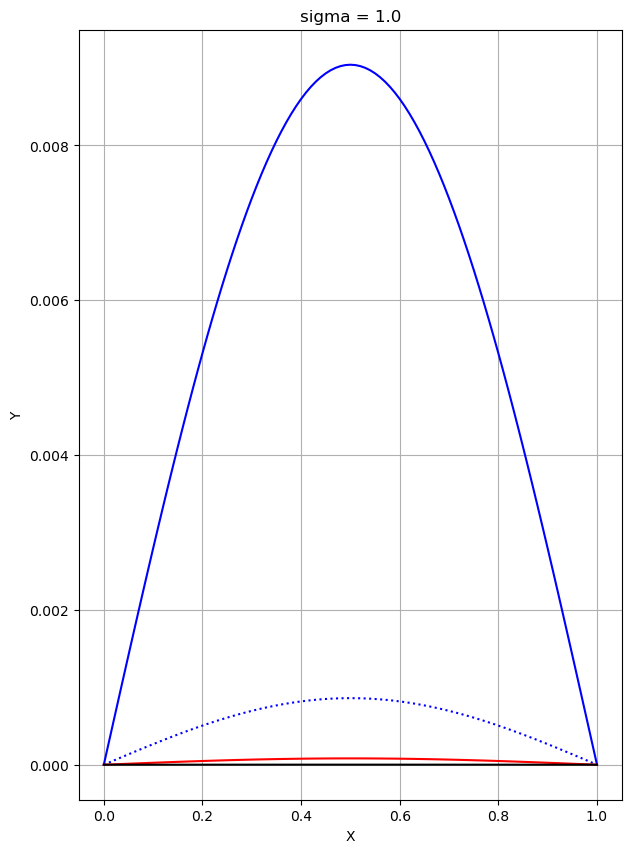

In [21]:
sigma = 1.0
h = 0.01
tay = 0.01
T_max = 3
my_max = 0
n = 100
t = int(T_max / tay + 1)
y = raznost(n, F, k, fi, m1, m2, sigma, h, tay, T_max)
for i in range(t):
    for l in range(n + 1):
        if (abs(y[i][l] - analit_reshen(h * l, i * tay)) > my_max):
            my_max = abs(y[i][l] - analit_reshen(h * l, i * tay))
x = list(map(lambda i: i/100, list(range(0, 101))))
fig = plt.figure(figsize=(7, 10))
ax = fig.add_subplot()
ax.plot(x, y[50], 'b')
ax.plot(x, y[75], ':b')
print("max = ", my_max)
print("t = 0.5, 0.75, 1, 1.5")
plt.title('sigma = 1.0')
ax.plot(x, y[100], 'r')
ax.plot(x, y[150], 'k')
#ax.plot(x, list(map(lambda i: analit_reshen(i, 50), x)))

ax.grid()
plt.ylabel('Y')   
plt.xlabel('X') 
plt.show()

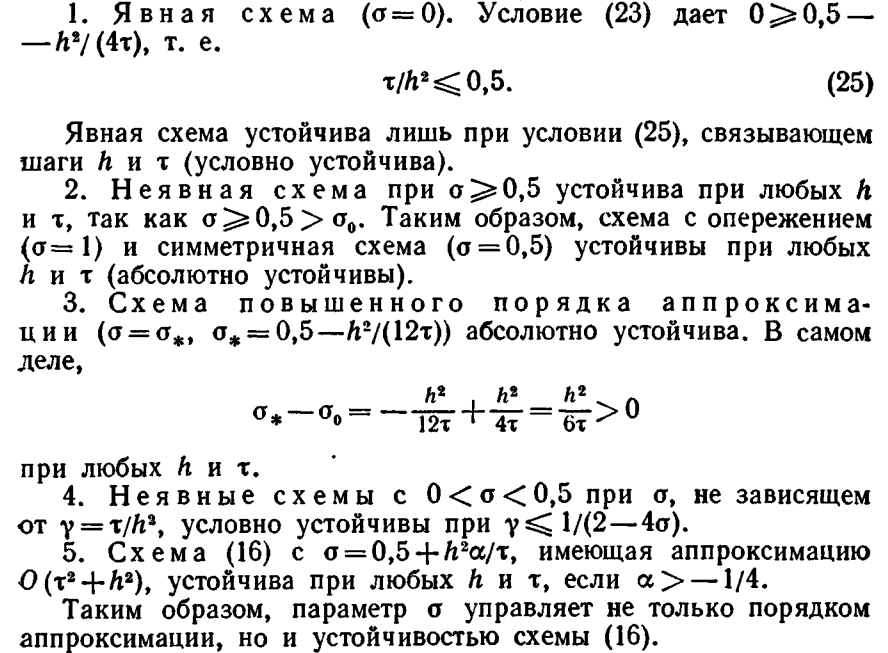